In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import math
import glob
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

2025-02-19 00:04:40.563682: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import re

In [3]:
datapath = "../../data/MobiAct_feature_aug.csv"
df = pd.read_csv(datapath)
df.head()

,AvgX,AvgY,AvgZ,MedianX,MedianY,MedianZ,StdX,StdY,StdZ,SkewX,...,AbsMaxZ,AbsSlope,MeanMag,StdMag,MinMag,MaxMag,DiffMinMaxMag,ZCR_Mag,AverageResultantAcceleration,label
0,7.079540,0.292400,3.763926,8.336310,-0.800637,4.799377,2.868003,4.616586,2.274586,-1.821233,...,12.732082,25.968431,99.065435,37.258635,29.541558,567.998312,538.456755,0,99.065435,BSC
1,7.173739,1.640782,4.361933,7.536947,1.973893,5.578871,2.253994,3.824003,2.581553,-1.826785,...,13.052741,28.237861,99.534564,41.252435,30.958310,514.237251,483.278940,0,99.534564,BSC
2,7.330632,2.381979,3.417897,8.192033,3.039308,4.317029,2.640936,4.069859,2.199644,-1.708481,...,10.945221,27.597204,99.455316,40.969060,20.501091,523.780867,503.279777,0,99.455316,BSC
3,-5.568553,-0.217635,6.616517,-6.148310,-0.676446,7.363430,2.473055,3.530614,1.962968,1.075171,...,18.426916,31.743260,97.257094,56.157126,2.593039,961.689593,959.096554,0,97.257094,BSC
4,-4.795033,0.358094,7.179030,-5.434174,0.013750,7.892242,2.168915,3.643256,2.230609,1.192495,...,19.105164,32.353318,97.600097,63.150734,2.032286,1033.791111,1031.758825,0,97.600097,BSC


In [4]:
df.info() 
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AvgX                          3294 non-null   float64
 1   AvgY                          3294 non-null   float64
 2   AvgZ                          3294 non-null   float64
 3   MedianX                       3294 non-null   float64
 4   MedianY                       3294 non-null   float64
 5   MedianZ                       3294 non-null   float64
 6   StdX                          3294 non-null   float64
 7   StdY                          3294 non-null   float64
 8   StdZ                          3294 non-null   float64
 9   SkewX                         3294 non-null   float64
 10  SkewY                         3294 non-null   float64
 11  SkewZ                         3294 non-null   float64
 12  KurtosisX                     3294 non-null   float64
 13  Kur

,count,mean,std,min,25%,50%,75%,max
AvgX,3294.0,0.410833,3.628758,-9.886928,-1.945098,0.449712,2.950076,9.705663
AvgY,3294.0,4.251255,4.901131,-9.794727,1.638448,4.703366,8.814596,10.297934
AvgZ,3294.0,1.745927,4.209410,-9.826976,-0.297116,1.475094,5.766374,9.405894
MedianX,3294.0,0.406599,3.984900,-9.770841,-1.960339,0.311817,3.012170,9.819040
MedianY,3294.0,3.965840,5.433286,-10.408320,0.498359,3.532161,9.441478,11.140900
MedianZ,3294.0,1.766999,4.856065,-9.949785,-0.492540,0.822284,6.815637,9.553715
StdX,3294.0,2.372219,1.132904,0.035555,1.599901,2.211373,2.938132,7.859170
StdY,3294.0,3.822120,1.778256,0.023811,2.695819,3.277098,4.827666,9.902119
StdZ,3294.0,2.901933,1.017588,0.041281,2.207353,2.770354,3.573924,7.543139
SkewX,3294.0,-0.029612,1.237420,-4.765660,-0.797864,0.010570,0.791700,6.732506


In [5]:
print (df.isnull().sum()) 
print (any(df.isnull().sum()))

AvgX                            0
AvgY                            0
AvgZ                            0
MedianX                         0
MedianY                         0
MedianZ                         0
StdX                            0
StdY                            0
StdZ                            0
SkewX                           0
SkewY                           0
SkewZ                           0
KurtosisX                       0
KurtosisY                       0
KurtosisZ                       0
MinX                            0
MinY                            0
MinZ                            0
MaxX                            0
MaxY                            0
MaxZ                            0
Slope                           0
MeanTA                          0
StdTA                           0
SkewTA                          0
KurtosisTA                      0
AbsX                            0
AbsY                            0
AbsZ                            0
AbsMeanX      

In [6]:
from sklearn.preprocessing import StandardScaler

labels = df['label']
features = df.drop('label', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

df = pd.DataFrame(features_scaled, columns=features.columns)
df['label'] = labels

In [7]:
print (f"{np.unique(df['label'])}")
print (df['label'].value_counts())

normal_labels = list(np.unique(df['label']))
normal_labels.remove('FKL')
normal_labels.remove('FOL')

['BSC' 'CHU' 'CSI' 'CSO' 'FKL' 'FOL' 'JOG' 'JUM' 'SBE' 'SBW' 'SCH' 'SDL'
 'SIT' 'SLH' 'SLW' 'SRH' 'STD' 'STN' 'STU' 'WAL']
label
SCH    365
STN    365
STU    364
CSO    360
CSI    358
SDL    192
FKL    192
FOL    192
BSC    191
JUM    183
JOG    183
CHU    114
WAL     61
STD     60
SBW     19
SBE     19
SIT     19
SLH     19
SLW     19
SRH     19
Name: count, dtype: int64


In [8]:
train_data = []
train_labels = []
test_normal_data = []
test_normal_labels = []

for activity in normal_labels:
    activity_data = df[df['label'] == activity]
    split_idx = int(len(activity_data) * 0.7)
    
    activity_features = activity_data.drop('label', axis=1)  
    
    train_data.append(activity_features.iloc[:split_idx])
    train_labels.append(np.zeros(len(activity_features.iloc[:split_idx]))) 
    
    test_normal_data.append(activity_features.iloc[split_idx:])
    test_normal_labels.append(np.zeros(len(activity_features.iloc[split_idx:]))) 

fall_data = df[df['label'].isin(['FKL', 'FOL'])]
test_fall_data = fall_data.drop('label', axis=1)
test_fall_labels = np.ones(len(fall_data)) 

train_data = pd.concat(train_data)
train_labels = np.concatenate(train_labels)
test_adl_data = pd.concat(test_normal_data)
test_adl_labels = np.concatenate(test_normal_labels)

print("train_data shape:", train_data.shape)
print("train_labels shape:", train_labels.shape)
print("test_adl_data shape:", test_adl_data.shape)
print("test_adl_labels shape:", test_adl_labels.shape)
print("test_fall_data shape:", test_fall_data.shape)
print("test_fall_labels shape:", test_fall_labels.shape)

print (set(train_labels))
print (set(test_adl_labels))
print (set(test_fall_labels))

train_data shape: (2029, 58)
train_labels shape: (2029,)
test_adl_data shape: (881, 58)
test_adl_labels shape: (881,)
test_fall_data shape: (384, 58)
test_fall_labels shape: (384,)
{0.0}
{0.0}
{1.0}


In [9]:
def split_sequences(data, labels, n_steps, stride):
    X, y = list(), list()
    
    sequences = np.column_stack((data, labels))
    
    for i in range(0, len(sequences) - n_steps + 1, stride):
        end_ix = i + n_steps
        
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [10]:
train_data, train_labels = split_sequences(train_data, train_labels, n_steps=50, stride=5)
test_adl_data, test_adl_labels = split_sequences(test_adl_data, test_adl_labels, n_steps=50, stride=5)
test_fall_data, test_fall_labels = split_sequences(test_fall_data, test_fall_labels, n_steps=50, stride=5)

print (train_data.shape, train_labels.shape)
print (test_adl_data.shape, test_adl_labels.shape)
print (test_fall_data.shape, test_fall_labels.shape)

(396, 50, 58) (396,)
(167, 50, 58) (167,)
(67, 50, 58) (67,)


----

In [11]:
EPOCHS = 300
LEARNING_RATE = 2e-4
DECAY_STEPS = 1000  
DECAY_RATE = 0.98  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64

In [12]:
class MobiActDataset(Dataset):
    def __init__(self, data):
        # Transpose data from [batch, window_length, features] to [batch, features, window_length]
        data = data.transpose(0, 2, 1)
        self.data = torch.FloatTensor(data)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]  # Returns shape [features, window_length]

In [13]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding='same'),
            nn.ReLU()
        )
        
        # Multiple Linear layers with increasing complexity
        self.mlp = nn.Sequential(
            nn.Linear(out_channels, out_channels * 2),
            nn.ReLU(),
            nn.Linear(out_channels * 2, out_channels * 4),
            nn.ReLU(),
            nn.Linear(out_channels * 4, out_channels * 2),
            nn.ReLU(),
            nn.Linear(out_channels * 2, out_channels)
        )
        
        # Layer Normalization for better training stability
        self.layer_norm = nn.LayerNorm(out_channels)
        
    def forward(self, x):
        # Convolutional path
        x = self.conv(x)
        
        # Reshape for Linear layers
        batch_size, channels, seq_len = x.shape
        x = x.transpose(1, 2)  # (batch, seq_len, channels)
        
        # Apply MLP to each timestep
        x = self.mlp(x)
        
        # Layer normalization
        x = self.layer_norm(x)
        
        # Reshape back to Conv format
        x = x.transpose(1, 2)  # (batch, channels, seq_len)
        
        return x

In [14]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

In [15]:
class AttentionBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.channels = channels
        self.mha = nn.MultiheadAttention(channels, 8, batch_first=True)
        self.ln = nn.LayerNorm([channels])
        self.ff_self = nn.Sequential(
            nn.LayerNorm([channels]),
            nn.Linear(channels, channels * 4),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(channels * 4, channels),
        )

    def forward(self, x):
        shape = x.shape
        x = x.transpose(1, 2)
        x = x + self.mha(x, x, x)[0]
        x = x + self.ff_self(x)
        x = x.transpose(1, 2)
        return x

In [16]:
class EnhancedResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, 3, padding=1)
        self.conv2 = nn.Conv1d(out_channels, out_channels, 3, padding=1)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.relu = nn.GELU() 
        self.dropout = nn.Dropout(0.3)
        self.se = SqueezeExcitation(out_channels) 
        
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, 1),
                nn.BatchNorm1d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        x = self.se(x)
        x = x + residual
        x = self.relu(x)
        return x

In [17]:
class SqueezeExcitation(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.seq = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),
            nn.Conv1d(channels, channels // reduction, 1),
            nn.ReLU(),
            nn.Conv1d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return x * self.seq(x)


In [18]:
class EnhancedUNet1D(nn.Module):
    def __init__(self, in_channels=58):
        super().__init__()
        
        self.time_embed = nn.Sequential(
            SinusoidalPositionEmbeddings(64),
            nn.Linear(64, 128),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(128, 128)
        )
        
        self.enc1 = nn.Sequential(
            EnhancedResidualBlock(in_channels, 64),
            AttentionBlock(64)
        )
        self.pool1 = nn.MaxPool1d(2)
        
        self.enc2 = nn.Sequential(
            EnhancedResidualBlock(64, 128),
            AttentionBlock(128)
        )
        self.pool2 = nn.MaxPool1d(2)
        
        self.enc3 = nn.Sequential(
            EnhancedResidualBlock(128, 256),
            AttentionBlock(256)
        )
        self.pool3 = nn.MaxPool1d(2)
        
        self.bottleneck = nn.Sequential(
            EnhancedResidualBlock(256, 512),
            AttentionBlock(512),
            EnhancedResidualBlock(512, 512),
            AttentionBlock(512)
        )
        
        self.time_mlp = nn.Sequential(
            nn.Linear(128, 512),
            nn.GELU()
        )
        
        self.upconv3 = nn.ConvTranspose1d(512, 256, 2, stride=2)
        self.dec3 = nn.Sequential(
            EnhancedResidualBlock(512, 256),
            AttentionBlock(256)
        )
        
        self.upconv2 = nn.ConvTranspose1d(256, 128, 2, stride=2)
        self.dec2 = nn.Sequential(
            EnhancedResidualBlock(256, 128),
            AttentionBlock(128)
        )
        
        self.upconv1 = nn.ConvTranspose1d(128, 64, 2, stride=2)
        self.dec1 = nn.Sequential(
            EnhancedResidualBlock(128, 64),
            AttentionBlock(64)
        )
        
        self.final_conv = nn.Conv1d(64, in_channels, 1)
        
        self.dropout = nn.Dropout(0.2)

    def forward(self, x, t):
        t_emb = self.time_embed(t)
        t_emb = self.time_mlp(t_emb)
        
        e1 = self.dropout(self.enc1(x))
        p1 = self.pool1(e1)
        
        e2 = self.dropout(self.enc2(p1))
        p2 = self.pool2(e2)
        
        e3 = self.dropout(self.enc3(p2))
        p3 = self.pool3(e3)
        
        b = self.bottleneck(p3)
        b = b + t_emb.unsqueeze(-1)
        
        d3 = self.upconv3(b)
        if d3.shape[-1] != e3.shape[-1]:
            d3 = F.interpolate(d3, size=e3.shape[-1], mode='linear')
        d3 = torch.cat([d3, e3], dim=1)
        d3 = self.dropout(self.dec3(d3))
        
        d2 = self.upconv2(d3)
        if d2.shape[-1] != e2.shape[-1]:
            d2 = F.interpolate(d2, size=e2.shape[-1], mode='linear')
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.dropout(self.dec2(d2))
        
        d1 = self.upconv1(d2)
        if d1.shape[-1] != e1.shape[-1]:
            d1 = F.interpolate(d1, size=e1.shape[-1], mode='linear')
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.dropout(self.dec1(d1))
        
        return self.final_conv(d1)

In [19]:
class DDPM:
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02):
        """
        num_timesteps: total diffusion steps T
        beta_start, beta_end: β₁ and βₜ for linear schedule
        """
        self.num_timesteps = num_timesteps
        
        # Linear variance schedule
        self.betas = torch.linspace(beta_start, beta_end, num_timesteps)
        self.alphas = 1. - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        
    def q_sample(self, x_0, t):
        """
        Forward diffusion process: q(x_t | x_0)
        Samples from q(x_t | x_0) = N(x_t; √(αₜ)x₀, (1-αₜ)I)
        """
        sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod[t])[:, None, None]
        sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - self.alphas_cumprod[t])[:, None, None]
        epsilon = torch.randn_like(x_0)
        return sqrt_alphas_cumprod * x_0 + sqrt_one_minus_alphas_cumprod * epsilon, epsilon
    
    def sample_t(self, batch_size):
        """
        Uniformly sample timesteps t
        """
        return torch.randint(0, self.num_timesteps, (batch_size,))
        
    def p_sample(self, model, batch_size, device, shape):
        """
        Reverse diffusion process: p_θ(x_{t-1} | x_t)
        Generate samples using the reverse process
        """
        model.eval()
        with torch.no_grad():
            x_t = torch.randn(batch_size, *shape).to(device)
            
            for t in reversed(range(1, self.num_timesteps)):
                time_tensor = torch.ones(batch_size, dtype=torch.long).to(device) * t
                
                # Predict noise
                predicted_noise = model(x_t, time_tensor)
                
                alpha = self.alphas[t][:, None, None]
                alpha_cumprod = self.alphas_cumprod[t][:, None, None]
                beta = self.betas[t][:, None, None]
                
                # Add noise for stochasticity
                noise = torch.randn_like(x_t)
                
                # Compute mean for p_θ(x_{t-1} | x_t)
                x_t = 1 / torch.sqrt(alpha) * (
                    x_t - (1 - alpha) / torch.sqrt(1 - alpha_cumprod) * predicted_noise
                ) + torch.sqrt(beta) * noise
                
        model.train()
        return x_t

In [20]:
def setup_training(model, num_epochs):
    optimizer = optim.AdamW(
        model.parameters(),
        lr=LEARNING_RATE,
        weight_decay=0.01,
        betas=(0.9, 0.999)
    )
    
    scheduler = optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=LEARNING_RATE,
        epochs=num_epochs,
        steps_per_epoch=len(train_loader),
        pct_start=0.3,
        anneal_strategy='cos'
    )
    
    return optimizer, scheduler

In [21]:
def train_ddpm(model, train_loader, ddpm, optimizer, num_epochs, device, scheduler):
    model.train()
    best_loss = float('inf')
    patience = 15
    patience_counter = 0
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        n_batches = len(train_loader)
        
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            x_0 = batch.to(device)
            batch_size = x_0.shape[0]
            
            optimizer.zero_grad()
            
            t1 = ddpm.sample_t(batch_size).to(device)
            t2 = ddpm.sample_t(batch_size).to(device)
            
            x_t1, epsilon1 = ddpm.q_sample(x_0, t1)
            x_t2, epsilon2 = ddpm.q_sample(x_0, t2)
            
            epsilon_theta1 = model(x_t1, t1)
            epsilon_theta2 = model(x_t2, t2)
            
            loss1 = F.mse_loss(epsilon_theta1, epsilon1)
            loss2 = F.mse_loss(epsilon_theta2, epsilon2)
            
            loss = (loss1 + loss2) / 2
            
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            scheduler.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / n_batches
        print(f'Epoch {epoch+1}/{num_epochs} - Avg Loss: {avg_loss:.4f}')
        
        if avg_loss < best_loss:
            best_loss = avg_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping after {epoch+1} epochs')
                break

In [22]:
train_dataset = MobiActDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)

model = EnhancedUNet1D().to(device)
ddpm = DDPM(num_timesteps=1000)

optimizer, scheduler = setup_training(model, EPOCHS)

train_ddpm(
    model=model,
    train_loader=train_loader,
    ddpm=ddpm,
    optimizer=optimizer,
    num_epochs=EPOCHS,
    device=device,
    scheduler=scheduler
)

Epoch 1/300: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


Epoch 1/300 - Avg Loss: 1.2969


Epoch 2/300: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 2/300 - Avg Loss: 1.2900


Epoch 3/300: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 3/300 - Avg Loss: 1.2869


Epoch 4/300: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 4/300 - Avg Loss: 1.2817


Epoch 5/300: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 5/300 - Avg Loss: 1.2793


Epoch 6/300: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 6/300 - Avg Loss: 1.2696


Epoch 7/300: 100%|██████████████████████████████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 7/300 - Avg Loss: 1.2643


Epoch 8/300: 100%|██████████████████████████████████| 7/7 [00:06<00:00,  1.08it/s]


Epoch 8/300 - Avg Loss: 1.2608


Epoch 9/300: 100%|██████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 9/300 - Avg Loss: 1.2525


Epoch 10/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 10/300 - Avg Loss: 1.2485


Epoch 11/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 11/300 - Avg Loss: 1.2432


Epoch 12/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 12/300 - Avg Loss: 1.2354


Epoch 13/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 13/300 - Avg Loss: 1.2279


Epoch 14/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 14/300 - Avg Loss: 1.2214


Epoch 15/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.01s/it]


Epoch 15/300 - Avg Loss: 1.2125


Epoch 16/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.06s/it]


Epoch 16/300 - Avg Loss: 1.2067


Epoch 17/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.18s/it]


Epoch 17/300 - Avg Loss: 1.1995


Epoch 18/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 18/300 - Avg Loss: 1.1867


Epoch 19/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.18it/s]


Epoch 19/300 - Avg Loss: 1.1796


Epoch 20/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


Epoch 20/300 - Avg Loss: 1.1717


Epoch 21/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 21/300 - Avg Loss: 1.1605


Epoch 22/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 22/300 - Avg Loss: 1.1483


Epoch 23/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


Epoch 23/300 - Avg Loss: 1.1393


Epoch 24/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 24/300 - Avg Loss: 1.1242


Epoch 25/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 25/300 - Avg Loss: 1.1126


Epoch 26/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.11s/it]


Epoch 26/300 - Avg Loss: 1.0992


Epoch 27/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.19s/it]


Epoch 27/300 - Avg Loss: 1.0726


Epoch 28/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.08it/s]


Epoch 28/300 - Avg Loss: 1.0594


Epoch 29/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 29/300 - Avg Loss: 1.0422


Epoch 30/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.24s/it]


Epoch 30/300 - Avg Loss: 1.0293


Epoch 31/300: 100%|█████████████████████████████████| 7/7 [00:09<00:00,  1.30s/it]


Epoch 31/300 - Avg Loss: 1.0171


Epoch 32/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.19s/it]


Epoch 32/300 - Avg Loss: 1.0125


Epoch 33/300: 100%|█████████████████████████████████| 7/7 [00:10<00:00,  1.45s/it]


Epoch 33/300 - Avg Loss: 1.0021


Epoch 34/300: 100%|█████████████████████████████████| 7/7 [00:10<00:00,  1.46s/it]


Epoch 34/300 - Avg Loss: 0.9999


Epoch 35/300: 100%|█████████████████████████████████| 7/7 [00:10<00:00,  1.51s/it]


Epoch 35/300 - Avg Loss: 0.9923


Epoch 36/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.28s/it]


Epoch 36/300 - Avg Loss: 0.9896


Epoch 37/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.08s/it]


Epoch 37/300 - Avg Loss: 0.9842


Epoch 38/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.09s/it]


Epoch 38/300 - Avg Loss: 0.9805


Epoch 39/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.04it/s]


Epoch 39/300 - Avg Loss: 0.9779


Epoch 40/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 40/300 - Avg Loss: 0.9732


Epoch 41/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.01s/it]


Epoch 41/300 - Avg Loss: 0.9697


Epoch 42/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch 42/300 - Avg Loss: 0.9683


Epoch 43/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.04s/it]


Epoch 43/300 - Avg Loss: 0.9633


Epoch 44/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.26s/it]


Epoch 44/300 - Avg Loss: 0.9589


Epoch 45/300: 100%|█████████████████████████████████| 7/7 [00:10<00:00,  1.52s/it]


Epoch 45/300 - Avg Loss: 0.9585


Epoch 46/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.24s/it]


Epoch 46/300 - Avg Loss: 0.9519


Epoch 47/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.26s/it]


Epoch 47/300 - Avg Loss: 0.9496


Epoch 48/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.12s/it]


Epoch 48/300 - Avg Loss: 0.9460


Epoch 49/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.16s/it]


Epoch 49/300 - Avg Loss: 0.9426


Epoch 50/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.08s/it]


Epoch 50/300 - Avg Loss: 0.9422


Epoch 51/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.16s/it]


Epoch 51/300 - Avg Loss: 0.9369


Epoch 52/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.13s/it]


Epoch 52/300 - Avg Loss: 0.9359


Epoch 53/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.17s/it]


Epoch 53/300 - Avg Loss: 0.9290


Epoch 54/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.01s/it]


Epoch 54/300 - Avg Loss: 0.9242


Epoch 55/300: 100%|█████████████████████████████████| 7/7 [00:10<00:00,  1.53s/it]


Epoch 55/300 - Avg Loss: 0.9219


Epoch 56/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.27s/it]


Epoch 56/300 - Avg Loss: 0.9186


Epoch 57/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.25s/it]


Epoch 57/300 - Avg Loss: 0.9153


Epoch 58/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.25s/it]


Epoch 58/300 - Avg Loss: 0.9134


Epoch 59/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.08s/it]


Epoch 59/300 - Avg Loss: 0.9095


Epoch 60/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.14s/it]


Epoch 60/300 - Avg Loss: 0.9058


Epoch 61/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.08s/it]


Epoch 61/300 - Avg Loss: 0.8984


Epoch 62/300: 100%|█████████████████████████████████| 7/7 [00:09<00:00,  1.30s/it]


Epoch 62/300 - Avg Loss: 0.8970


Epoch 63/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.20s/it]


Epoch 63/300 - Avg Loss: 0.8913


Epoch 64/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.23s/it]


Epoch 64/300 - Avg Loss: 0.8872


Epoch 65/300: 100%|█████████████████████████████████| 7/7 [00:08<00:00,  1.17s/it]


Epoch 65/300 - Avg Loss: 0.8841


Epoch 66/300: 100%|█████████████████████████████████| 7/7 [00:10<00:00,  1.47s/it]


Epoch 66/300 - Avg Loss: 0.8807


Epoch 67/300: 100%|█████████████████████████████████| 7/7 [00:09<00:00,  1.35s/it]


Epoch 67/300 - Avg Loss: 0.8774


Epoch 68/300: 100%|█████████████████████████████████| 7/7 [00:10<00:00,  1.46s/it]


Epoch 68/300 - Avg Loss: 0.8699


Epoch 69/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.11s/it]


Epoch 69/300 - Avg Loss: 0.8692


Epoch 70/300: 100%|█████████████████████████████████| 7/7 [00:07<00:00,  1.07s/it]


Epoch 70/300 - Avg Loss: 0.8626


Epoch 71/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]


Epoch 71/300 - Avg Loss: 0.8604


Epoch 72/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.17it/s]


Epoch 72/300 - Avg Loss: 0.8554


Epoch 73/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


Epoch 73/300 - Avg Loss: 0.8597


Epoch 74/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 74/300 - Avg Loss: 0.8501


Epoch 75/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.35it/s]


Epoch 75/300 - Avg Loss: 0.8472


Epoch 76/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 76/300 - Avg Loss: 0.8464


Epoch 77/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 77/300 - Avg Loss: 0.8404


Epoch 78/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


Epoch 78/300 - Avg Loss: 0.8412


Epoch 79/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 79/300 - Avg Loss: 0.8391


Epoch 80/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


Epoch 80/300 - Avg Loss: 0.8299


Epoch 81/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.18it/s]


Epoch 81/300 - Avg Loss: 0.8256


Epoch 82/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.12it/s]


Epoch 82/300 - Avg Loss: 0.8240


Epoch 83/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.23it/s]


Epoch 83/300 - Avg Loss: 0.8243


Epoch 84/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


Epoch 84/300 - Avg Loss: 0.8186


Epoch 85/300: 100%|█████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]


Epoch 85/300 - Avg Loss: 0.8144


Epoch 86/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


Epoch 86/300 - Avg Loss: 0.8120


Epoch 87/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


Epoch 87/300 - Avg Loss: 0.8086


Epoch 88/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


Epoch 88/300 - Avg Loss: 0.8089


Epoch 89/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.23it/s]


Epoch 89/300 - Avg Loss: 0.8043


Epoch 90/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 90/300 - Avg Loss: 0.8005


Epoch 91/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 91/300 - Avg Loss: 0.7979


Epoch 92/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 92/300 - Avg Loss: 0.7922


Epoch 93/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 93/300 - Avg Loss: 0.7921


Epoch 94/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 94/300 - Avg Loss: 0.7918


Epoch 95/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


Epoch 95/300 - Avg Loss: 0.7837


Epoch 96/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


Epoch 96/300 - Avg Loss: 0.7856


Epoch 97/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.23it/s]


Epoch 97/300 - Avg Loss: 0.7869


Epoch 98/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 98/300 - Avg Loss: 0.7807


Epoch 99/300: 100%|█████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 99/300 - Avg Loss: 0.7767


Epoch 100/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 100/300 - Avg Loss: 0.7799


Epoch 101/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 101/300 - Avg Loss: 0.7769


Epoch 102/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 102/300 - Avg Loss: 0.7721


Epoch 103/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 103/300 - Avg Loss: 0.7715


Epoch 104/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 104/300 - Avg Loss: 0.7687


Epoch 105/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


Epoch 105/300 - Avg Loss: 0.7673


Epoch 106/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 106/300 - Avg Loss: 0.7638


Epoch 107/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 107/300 - Avg Loss: 0.7661


Epoch 108/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 108/300 - Avg Loss: 0.7576


Epoch 109/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 109/300 - Avg Loss: 0.7583


Epoch 110/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


Epoch 110/300 - Avg Loss: 0.7541


Epoch 111/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 111/300 - Avg Loss: 0.7523


Epoch 112/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 112/300 - Avg Loss: 0.7548


Epoch 113/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 113/300 - Avg Loss: 0.7480


Epoch 114/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 114/300 - Avg Loss: 0.7528


Epoch 115/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 115/300 - Avg Loss: 0.7592


Epoch 116/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.36it/s]


Epoch 116/300 - Avg Loss: 0.7441


Epoch 117/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


Epoch 117/300 - Avg Loss: 0.7458


Epoch 118/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 118/300 - Avg Loss: 0.7394


Epoch 119/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 119/300 - Avg Loss: 0.7405


Epoch 120/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 120/300 - Avg Loss: 0.7430


Epoch 121/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 121/300 - Avg Loss: 0.7388


Epoch 122/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 122/300 - Avg Loss: 0.7329


Epoch 123/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 123/300 - Avg Loss: 0.7365


Epoch 124/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 124/300 - Avg Loss: 0.7358


Epoch 125/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 125/300 - Avg Loss: 0.7368


Epoch 126/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 126/300 - Avg Loss: 0.7284


Epoch 127/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 127/300 - Avg Loss: 0.7273


Epoch 128/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 128/300 - Avg Loss: 0.7263


Epoch 129/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 129/300 - Avg Loss: 0.7288


Epoch 130/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 130/300 - Avg Loss: 0.7279


Epoch 131/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 131/300 - Avg Loss: 0.7224


Epoch 132/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.35it/s]


Epoch 132/300 - Avg Loss: 0.7223


Epoch 133/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 133/300 - Avg Loss: 0.7251


Epoch 134/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 134/300 - Avg Loss: 0.7142


Epoch 135/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 135/300 - Avg Loss: 0.7158


Epoch 136/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.23it/s]


Epoch 136/300 - Avg Loss: 0.7181


Epoch 137/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 137/300 - Avg Loss: 0.7160


Epoch 138/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 138/300 - Avg Loss: 0.7135


Epoch 139/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 139/300 - Avg Loss: 0.7116


Epoch 140/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 140/300 - Avg Loss: 0.7097


Epoch 141/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 141/300 - Avg Loss: 0.7065


Epoch 142/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 142/300 - Avg Loss: 0.7066


Epoch 143/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 143/300 - Avg Loss: 0.7154


Epoch 144/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 144/300 - Avg Loss: 0.7148


Epoch 145/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 145/300 - Avg Loss: 0.7028


Epoch 146/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 146/300 - Avg Loss: 0.7093


Epoch 147/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 147/300 - Avg Loss: 0.7082


Epoch 148/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 148/300 - Avg Loss: 0.7083


Epoch 149/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 149/300 - Avg Loss: 0.7019


Epoch 150/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 150/300 - Avg Loss: 0.7011


Epoch 151/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 151/300 - Avg Loss: 0.7042


Epoch 152/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 152/300 - Avg Loss: 0.6999


Epoch 153/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 153/300 - Avg Loss: 0.6947


Epoch 154/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.36it/s]


Epoch 154/300 - Avg Loss: 0.6958


Epoch 155/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 155/300 - Avg Loss: 0.7017


Epoch 156/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 156/300 - Avg Loss: 0.6961


Epoch 157/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 157/300 - Avg Loss: 0.6967


Epoch 158/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 158/300 - Avg Loss: 0.6944


Epoch 159/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 159/300 - Avg Loss: 0.6921


Epoch 160/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 160/300 - Avg Loss: 0.6907


Epoch 161/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 161/300 - Avg Loss: 0.6983


Epoch 162/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.36it/s]


Epoch 162/300 - Avg Loss: 0.6937


Epoch 163/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 163/300 - Avg Loss: 0.6938


Epoch 164/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 164/300 - Avg Loss: 0.6927


Epoch 165/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 165/300 - Avg Loss: 0.6852


Epoch 166/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 166/300 - Avg Loss: 0.6835


Epoch 167/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 167/300 - Avg Loss: 0.6935


Epoch 168/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 168/300 - Avg Loss: 0.6872


Epoch 169/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 169/300 - Avg Loss: 0.6896


Epoch 170/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 170/300 - Avg Loss: 0.6869


Epoch 171/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 171/300 - Avg Loss: 0.6957


Epoch 172/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 172/300 - Avg Loss: 0.6826


Epoch 173/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 173/300 - Avg Loss: 0.6814


Epoch 174/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 174/300 - Avg Loss: 0.6840


Epoch 175/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]


Epoch 175/300 - Avg Loss: 0.6808


Epoch 176/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 176/300 - Avg Loss: 0.6758


Epoch 177/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 177/300 - Avg Loss: 0.6822


Epoch 178/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 178/300 - Avg Loss: 0.6800


Epoch 179/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.35it/s]


Epoch 179/300 - Avg Loss: 0.6830


Epoch 180/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


Epoch 180/300 - Avg Loss: 0.6776


Epoch 181/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 181/300 - Avg Loss: 0.6832


Epoch 182/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 182/300 - Avg Loss: 0.6843


Epoch 183/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 183/300 - Avg Loss: 0.6788


Epoch 184/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 184/300 - Avg Loss: 0.6817


Epoch 185/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 185/300 - Avg Loss: 0.6798


Epoch 186/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 186/300 - Avg Loss: 0.6778


Epoch 187/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 187/300 - Avg Loss: 0.6820


Epoch 188/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 188/300 - Avg Loss: 0.6764


Epoch 189/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 189/300 - Avg Loss: 0.6781


Epoch 190/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 190/300 - Avg Loss: 0.6739


Epoch 191/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.35it/s]


Epoch 191/300 - Avg Loss: 0.6706


Epoch 192/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 192/300 - Avg Loss: 0.6768


Epoch 193/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 193/300 - Avg Loss: 0.6734


Epoch 194/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.35it/s]


Epoch 194/300 - Avg Loss: 0.6719


Epoch 195/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


Epoch 195/300 - Avg Loss: 0.6733


Epoch 196/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 196/300 - Avg Loss: 0.6715


Epoch 197/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 197/300 - Avg Loss: 0.6681


Epoch 198/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 198/300 - Avg Loss: 0.6710


Epoch 199/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 199/300 - Avg Loss: 0.6704


Epoch 200/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


Epoch 200/300 - Avg Loss: 0.6685


Epoch 201/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 201/300 - Avg Loss: 0.6730


Epoch 202/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 202/300 - Avg Loss: 0.6703


Epoch 203/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.23it/s]


Epoch 203/300 - Avg Loss: 0.6737


Epoch 204/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 204/300 - Avg Loss: 0.6650


Epoch 205/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 205/300 - Avg Loss: 0.6681


Epoch 206/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 206/300 - Avg Loss: 0.6725


Epoch 207/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 207/300 - Avg Loss: 0.6683


Epoch 208/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 208/300 - Avg Loss: 0.6609


Epoch 209/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


Epoch 209/300 - Avg Loss: 0.6675


Epoch 210/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 210/300 - Avg Loss: 0.6635


Epoch 211/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 211/300 - Avg Loss: 0.6717


Epoch 212/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 212/300 - Avg Loss: 0.6614


Epoch 213/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.24it/s]


Epoch 213/300 - Avg Loss: 0.6671


Epoch 214/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 214/300 - Avg Loss: 0.6618


Epoch 215/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 215/300 - Avg Loss: 0.6705


Epoch 216/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 216/300 - Avg Loss: 0.6660


Epoch 217/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.28it/s]


Epoch 217/300 - Avg Loss: 0.6626


Epoch 218/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 218/300 - Avg Loss: 0.6607


Epoch 219/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.35it/s]


Epoch 219/300 - Avg Loss: 0.6654


Epoch 220/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


Epoch 220/300 - Avg Loss: 0.6678


Epoch 221/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 221/300 - Avg Loss: 0.6666


Epoch 222/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 222/300 - Avg Loss: 0.6669


Epoch 223/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 223/300 - Avg Loss: 0.6604


Epoch 224/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 224/300 - Avg Loss: 0.6652


Epoch 225/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.36it/s]


Epoch 225/300 - Avg Loss: 0.6609


Epoch 226/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 226/300 - Avg Loss: 0.6596


Epoch 227/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 227/300 - Avg Loss: 0.6609


Epoch 228/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 228/300 - Avg Loss: 0.6702


Epoch 229/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 229/300 - Avg Loss: 0.6574


Epoch 230/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 230/300 - Avg Loss: 0.6600


Epoch 231/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 231/300 - Avg Loss: 0.6661


Epoch 232/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 232/300 - Avg Loss: 0.6624


Epoch 233/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 233/300 - Avg Loss: 0.6513


Epoch 234/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 234/300 - Avg Loss: 0.6593


Epoch 235/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


Epoch 235/300 - Avg Loss: 0.6567


Epoch 236/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 236/300 - Avg Loss: 0.6579


Epoch 237/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 237/300 - Avg Loss: 0.6572


Epoch 238/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.27it/s]


Epoch 238/300 - Avg Loss: 0.6541


Epoch 239/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 239/300 - Avg Loss: 0.6606


Epoch 240/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 240/300 - Avg Loss: 0.6550


Epoch 241/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 241/300 - Avg Loss: 0.6542


Epoch 242/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 242/300 - Avg Loss: 0.6567


Epoch 243/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 243/300 - Avg Loss: 0.6617


Epoch 244/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.36it/s]


Epoch 244/300 - Avg Loss: 0.6533


Epoch 245/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.31it/s]


Epoch 245/300 - Avg Loss: 0.6562


Epoch 246/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


Epoch 246/300 - Avg Loss: 0.6601


Epoch 247/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]


Epoch 247/300 - Avg Loss: 0.6549


Epoch 248/300: 100%|████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]

Epoch 248/300 - Avg Loss: 0.6553
Early stopping after 248 epochs


---

In [23]:
def detect_anomalies(model, ddpm, data_loader, device, threshold=None):
    model.eval()
    anomaly_scores = []

    with torch.no_grad():
        for batch in data_loader:
            x_0 = batch.to(device)
            batch_size = x_0.shape[0]

            t = ddpm.sample_t(batch_size).to(device)

            x_t, epsilon = ddpm.q_sample(x_0, t)

            epsilon_theta = model(x_t, t)

            # MSE Loss (Anomaly Score)
            loss = F.mse_loss(epsilon_theta, epsilon, reduction='none')
            loss = loss.mean(dim=(1, 2)) 
            anomaly_scores.extend(loss.cpu().numpy())  

    if threshold is None:
        threshold = np.percentile(anomaly_scores, 95)

    anomalies = [score > threshold for score in anomaly_scores]

    return anomalies, anomaly_scores, threshold


In [24]:
normal_dataset = MobiActDataset(test_adl_data)
normal_loader = DataLoader(normal_dataset, batch_size=BATCH_SIZE)

abnormal_dataset = MobiActDataset(test_fall_data)
abnormal_loader = DataLoader(abnormal_dataset, batch_size=BATCH_SIZE)

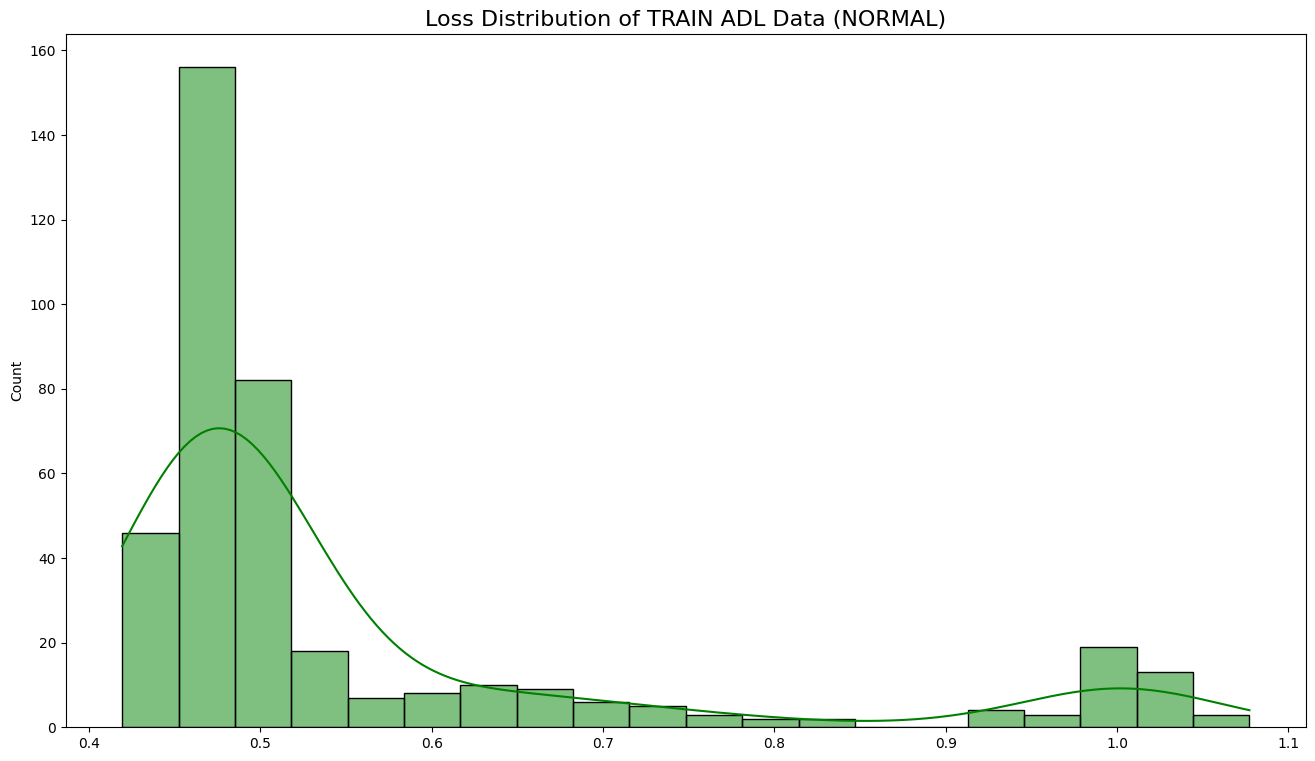

In [25]:
train_dataset = MobiActDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)

train_anomalies, train_scores, _ = detect_anomalies(model, ddpm, train_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TRAIN ADL Data (NORMAL)', fontsize=16)
sns.histplot(train_scores, bins=20, kde=True, color='green')
plt.show()

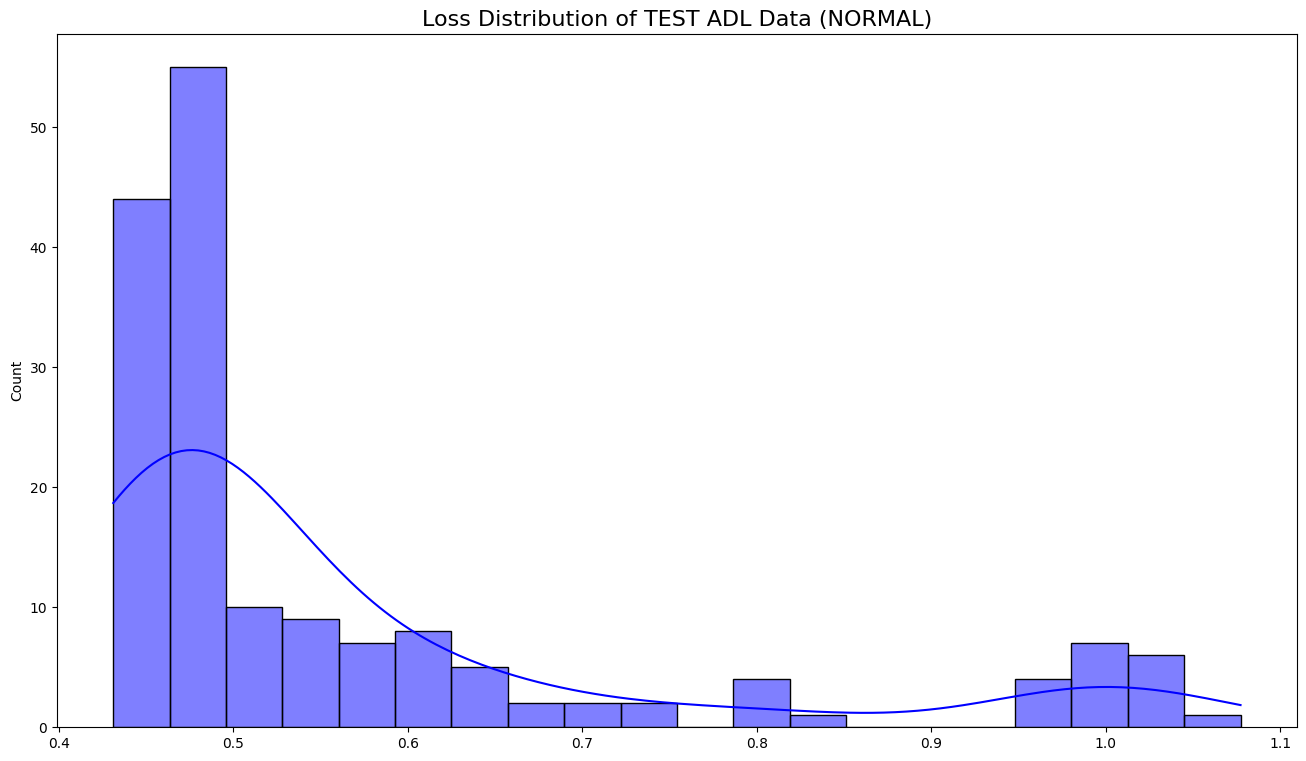

In [26]:
normal_anomalies, normal_scores, _ = detect_anomalies(model, ddpm, normal_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TEST ADL Data (NORMAL)', fontsize=16)
sns.histplot(normal_scores, bins=20, kde=True, color='blue')
plt.show()

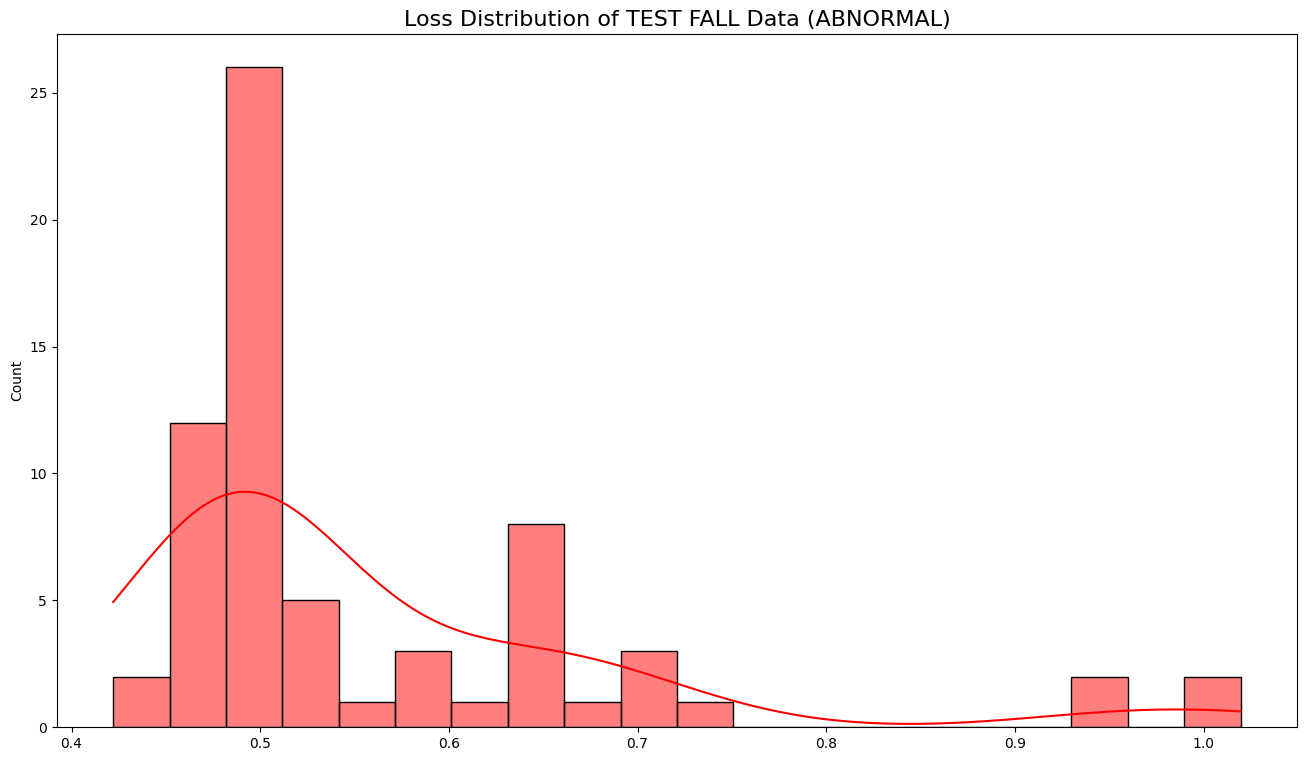

In [27]:
abnormal_anomalies, abnormal_scores, _ = detect_anomalies(model, ddpm, abnormal_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TEST FALL Data (ABNORMAL)', fontsize=16)
sns.histplot(abnormal_scores, bins=20, kde=True, color='red')
plt.show()

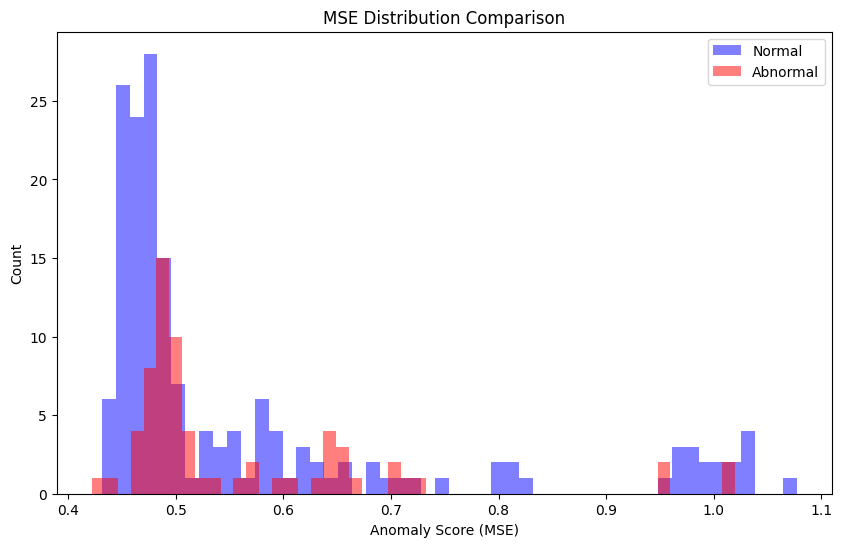

In [28]:
plt.figure(figsize=(10,6))
plt.title('MSE Distribution Comparison')
plt.hist(normal_scores, bins=50, alpha=0.5, color='blue', label='Normal')
plt.hist(abnormal_scores, bins=50, alpha=0.5, color='red', label='Abnormal')
plt.xlabel('Anomaly Score (MSE)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [29]:
error_df = pd.DataFrame({
    'reconstruction_error': np.concatenate([normal_scores, abnormal_scores]),
    'true_class': np.concatenate([np.zeros(len(normal_scores)), np.ones(len(abnormal_scores))])
})

print ("error dataframe head : ")
print(error_df.head(10))
print ()
print ("error dataframe tail : ")
print(error_df.tail(10))
print ()
print(error_df.describe())
print ()
error_df['true_class'].value_counts()

error dataframe head : 
   reconstruction_error  true_class
0              0.618080         0.0
1              0.629864         0.0
2              0.592866         0.0
3              0.583013         0.0
4              0.471299         0.0
5              0.446502         0.0
6              0.458430         0.0
7              0.454604         0.0
8              0.478976         0.0
9              0.468516         0.0

error dataframe tail : 
     reconstruction_error  true_class
224              0.952729         1.0
225              0.482233         1.0
226              0.520363         1.0
227              0.493423         1.0
228              0.495952         1.0
229              0.470333         1.0
230              0.573989         1.0
231              0.488854         1.0
232              0.480511         1.0
233              0.655523         1.0

       reconstruction_error  true_class
count            234.000000  234.000000
mean               0.564082    0.286325
std             

true_class
0.0    167
1.0     67
Name: count, dtype: int64

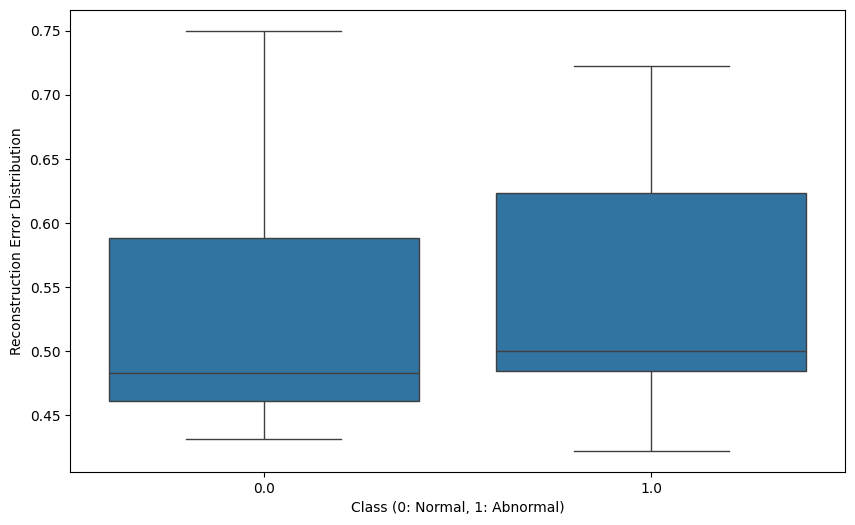

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='true_class', y='reconstruction_error', data=error_df, showfliers=False)
plt.ylabel('Reconstruction Error Distribution')
plt.xlabel('Class (0: Normal, 1: Abnormal)')
plt.show()

In [35]:
# threshold = np.percentile(normal_scores, 90)
threshold = 0.5

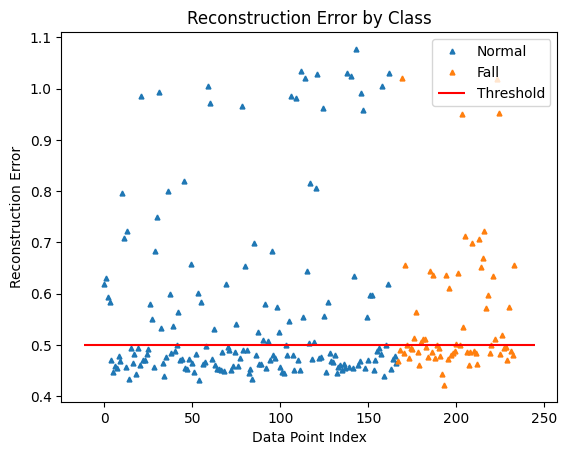

In [36]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label="Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction Error by Class")
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.show()

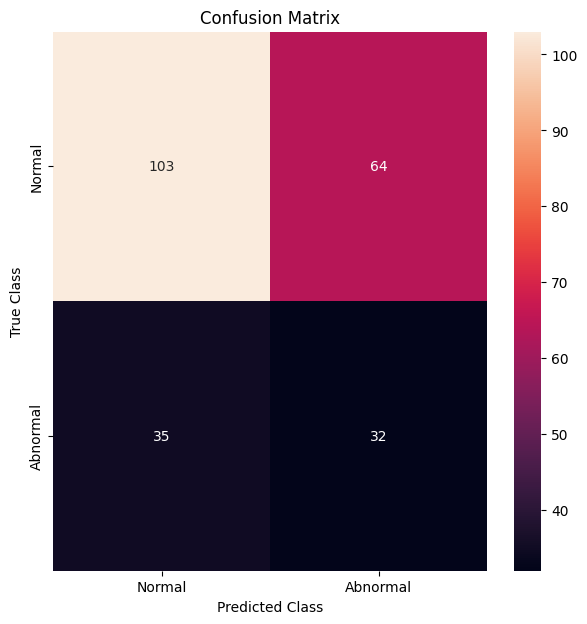

In [37]:
LABELS = ["Normal", "Abnormal"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [38]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(error_df.true_class, y_pred, average='binary')
accuracy = accuracy_score(error_df.true_class, y_pred)

print('\nPerformance Metrics:')
print(f'Accuracy Score : {accuracy:.4f}')
print(f'Precision     : {precision:.4f}')
print(f'Recall        : {recall:.4f}')
print(f'F1 Score      : {f1:.4f}')


Performance Metrics:
Accuracy Score : 0.5769
Precision     : 0.3333
Recall        : 0.4776
F1 Score      : 0.3926
